In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Define a 2D object (e.g., rectangle)
rectangle = np.array([[0, 0], [2, 0], [2, 1], [0, 1], [0, 0]])


In [ ]:
# Translation
def translate(shape, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))  # Homogeneous coordinates
    return np.dot(translation_matrix, shape_h.T).T[:, :2]

# Scaling
def scale(shape, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))
    return np.dot(scaling_matrix, shape_h.T).T[:, :2]

# Rotation
def rotate(shape, angle):
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                 [np.sin(theta), np.cos(theta), 0],
                                 [0, 0, 1]])
    shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))
    return np.dot(rotation_matrix, shape_h.T).T[:, :2]

# Reflection
def reflect(shape, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))
    return np.dot(reflection_matrix, shape_h.T).T[:, :2]

# Shearing
def shear(shape, shear_x=0, shear_y=0):
    shear_matrix = np.array([[1, shear_x, 0], [shear_y, 1, 0], [0, 0, 1]])
    shape_h = np.hstack((shape, np.ones((shape.shape[0], 1))))
    return np.dot(shear_matrix, shape_h.T).T[:, :2]

In [ ]:
# Plotting Function
def plot_transformation(original, transformed, title):
    plt.figure(figsize=(6, 6))
    plt.plot(original[:, 0], original[:, 1], label='Original', marker='o')
    plt.plot(transformed[:, 0], transformed[:, 1], label='Transformed', marker='x')
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

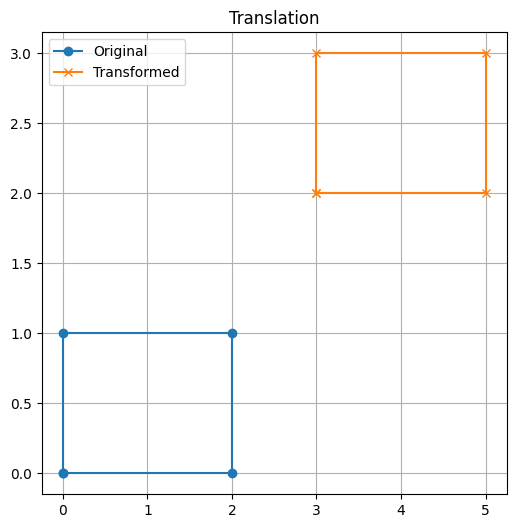

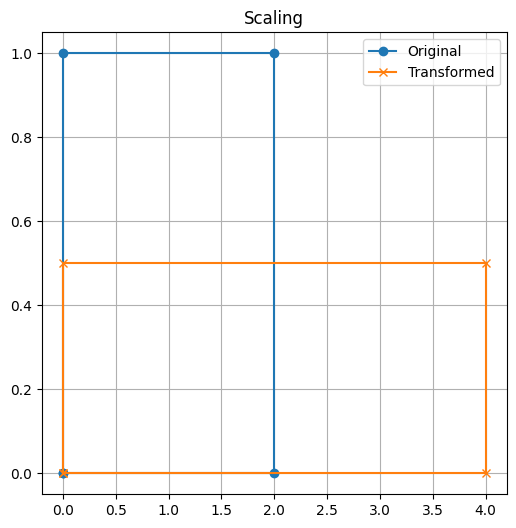

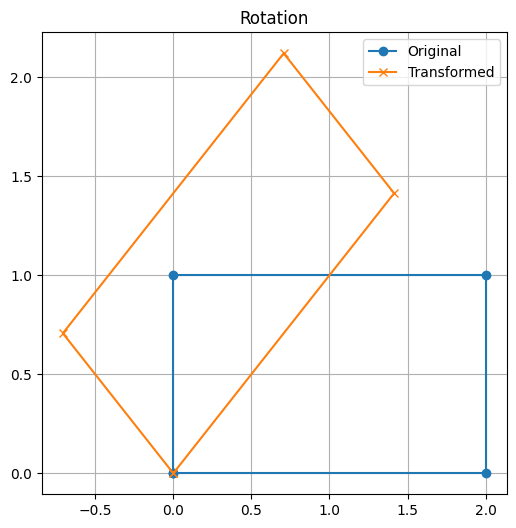

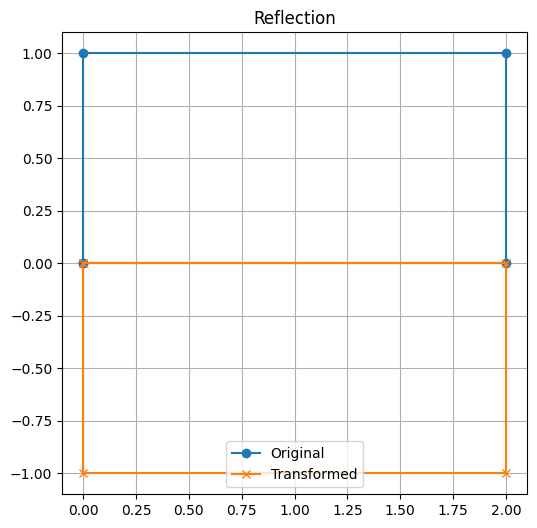

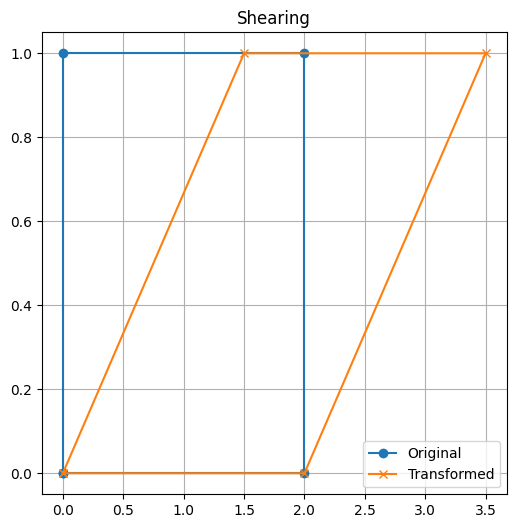

In [ ]:
# Apply Transformations
translated = translate(rectangle, 3, 2)
scaled = scale(rectangle, 2, 0.5)
rotated = rotate(rectangle, 45)
reflected = reflect(rectangle, 'x')
sheared = shear(rectangle, shear_x=1.5)

# Plot Results
plot_transformation(rectangle, translated, "Translation")
plot_transformation(rectangle, scaled, "Scaling")
plot_transformation(rectangle, rotated, "Rotation")
plot_transformation(rectangle, reflected, "Reflection")
plot_transformation(rectangle, sheared, "Shearing")

In [ ]:
from google.colab import files
uploaded = files.upload()  # Opens file upload dialog

Saving bla.jpg to bla.jpg


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_path = "bla.jpg"  # Change if needed
image = cv2.imread(image_path)

if image is not None:
    cv2_imshow(image)  # Display the image
else:
    print("Error: Image not found or cannot be loaded.")

In [ ]:
# Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols, rows))

# Reflection
def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)
    elif axis == 'xy':
        return cv2.flip(img, -1)

# Rotation
def rotate_image(img, angle, scale=1.0):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(img, M, (cols, rows))

# Scaling
def scale_image(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# Cropping
def crop_image(img, x1, y1, x2, y2):
    return img[y1:y2, x1:x2]

# Shearing
def shear_image(img, shear_x=0, shear_y=0):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    return cv2.warpAffine(img, M, (cols, rows))


In [ ]:
# Apply Transformations
translated = translate_image(image, 50, 50)
reflected = reflect_image(image, 'x')
rotated = rotate_image(image, 45)
scaled = scale_image(image, 1.5, 1.5)
cropped = crop_image(image, 50, 50, 200, 200)
sheared = shear_image(image, 0.2, 0.1)

# Display Results
cv2_imshow(translated)
cv2_imshow(reflected)
cv2_imshow(rotated)
cv2_imshow(scaled)
cv2_imshow(cropped)
cv2_imshow(sheared)

In [ ]:
!pip install PDFNetPython3==8.1.0

ERROR: Could not find a version that satisfies the requirement PDFNetPython3==8.1.0 (from versions: 9.5.0.post1)
ERROR: No matching distribution found for PDFNetPython3==8.1.0
